In [1]:
from polypy import read as rd
from polypy import msd as msd
from polypy import utils as ut
from polypy import write as wr
import numpy as np

In [2]:
timestep = 0.1

In [3]:
data = rd.read_history("example_data/HISTORY", ["F"])

In [4]:
msd_data = msd.msd(data, timestep)

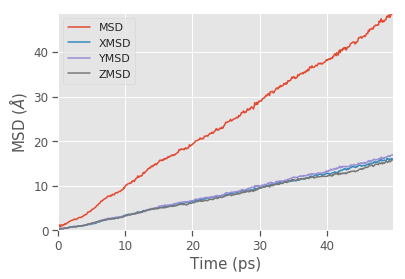

In [5]:
wr.msd_plot(msd_data, set_style="ggplot")

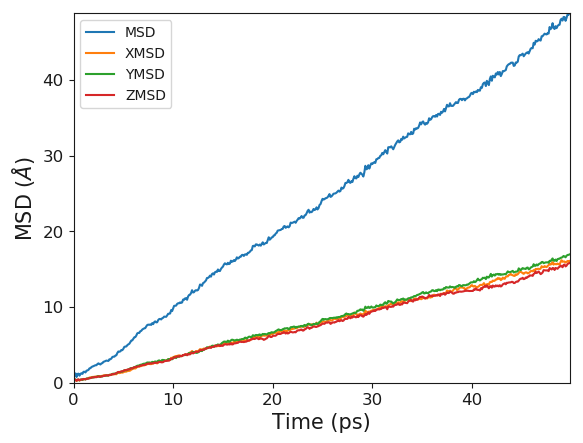

In [6]:
wr.msd_plot(msd_data)

In [7]:
Diff = ut.linear_regression(msd_data['time'], msd_data['msd'])
Diffusion_Coefficient = ut.three_d_diffusion_coefficient(Diff)

XDiff = ut.linear_regression(msd_data['time'], msd_data['xmsd'])
XDiffusion_Coefficient = ut.three_d_diffusion_coefficient(XDiff)

YDiff = ut.linear_regression(msd_data['time'], msd_data['ymsd'])
YDiffusion_Coefficient = ut.three_d_diffusion_coefficient(YDiff)

ZDiff = ut.linear_regression(msd_data['time'], msd_data['zmsd'])
ZDiffusion_Coefficient = ut.three_d_diffusion_coefficient(ZDiff)

In [8]:
print("Three Dimensional Diffusion Coefficient", Diffusion_Coefficient, "")
print("One Dimensional Diffusion Coefficient in X", XDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Y", YDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Z", ZDiffusion_Coefficient)


Three Dimensional Diffusion Coefficient 1.5982842660277743 
One Dimensional Diffusion Coefficient in X 0.5320682056322482
One Dimensional Diffusion Coefficient in Y 0.5560502622454371
One Dimensional Diffusion Coefficient in Z 0.510165798150089


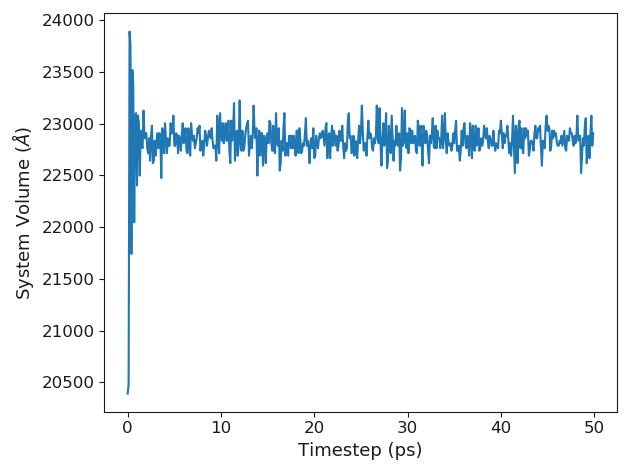

In [9]:
volume, time = ut.system_volume(data, timestep)
wr.volume_plot(time, volume)
Average_Volume = np.mean(volume)

In [10]:
Number_of_Charge_Carriers = data['natoms']

In [11]:
Ionic_Conductivity = ut.conductivity(Number_of_Charge_Carriers, Average_Volume, Diffusion_Coefficient, 1500)

In [12]:
print("Ionic Conductivity :", Ionic_Conductivity)

Ionic Conductivity : 86.741550323168
